<a href="https://colab.research.google.com/github/StevenMena/05MIAR---Aprendizaje_Supervisado/blob/main/Programa10_EvaluacionRegresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from math import sqrt
from pprint import pprint
from sklearn import datasets
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [ ]:
# Cargar y explorar los datos
datos = datasets.load_boston()
pprint(datos)
print(np.shape(datos.data))

{'DESCR': '.. _boston_dataset:\n'
          '\n'
          'Boston house prices dataset\n'
          '---------------------------\n'
          '\n'
          '**Data Set Characteristics:**  \n'
          '\n'
          '    :Number of Instances: 506 \n'
          '\n'
          '    :Number of Attributes: 13 numeric/categorical predictive. '
          'Median Value (attribute 14) is usually the target.\n'
          '\n'
          '    :Attribute Information (in order):\n'
          '        - CRIM     per capita crime rate by town\n'
          '        - ZN       proportion of residential land zoned for lots '
          'over 25,000 sq.ft.\n'
          '        - INDUS    proportion of non-retail business acres per '
          'town\n'
          '        - CHAS     Charles River dummy variable (= 1 if tract '
          'bounds river; 0 otherwise)\n'
          '        - NOX      nitric oxides concentration (parts per 10 '
          'million)\n'
          '        - RM       average num

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
# Extraer la matriz de datos "X" y la variable target "y"

X = datos.data
y = datos.target

print(X)
print(y)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.

In [ ]:
# Partición EXTERNA: hold-out split 80% train - 20% test.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# Estandarización de los datos de entrenamiento y test
stdr = preprocessing.StandardScaler()
X_train = stdr.fit_transform(X_train)
X_test = stdr.transform(X_test)

In [ ]:
# Métricas de evaluación.
#Durante la validacion cruzada yo puedo establecer metricas para observar y analizar en el entrenamiento de mi modelo
#Las metricas que se pueden aplicar a un algoritmo están separadas por clasificación, clustering y regresión
#https://scikit-learn.org/stable/modules/model_evaluation.html
#Este es un problema de regresión
# Con make_scorer() podemos convertir cualquier función en una métrica de evaluación
metricas = {
  'MAE': 'neg_mean_absolute_error',
  'RMSE': make_scorer(lambda y, y_pred:
                      sqrt(mean_squared_error(y, y_pred)),
                      greater_is_better=False),
  'MAPE': make_scorer(lambda y, y_pred:
                      np.mean(np.abs((y - y_pred) / y)) * 100,
                      greater_is_better=False)}

In [ ]:
# Definimos un algoritmo SVM de regresión
#Podemos ajustar los hiperparametros según los resultados que obtengamos en el entrenamiento
alg = SVR(C=100,gamma='auto',kernel='rbf')
#alg = RandmonForestRegressor(n_estimators=1000,criterion='squared_error')

In [ ]:
# Validación y evaluación del modelo.
# en "cv = KFold(n_splits=5)" se hace un cross-validation INTERNO!! 
#LA DIFERENCIA ENTRE CROSS_VALIDATE_SCORE, CON ESTE ES QUE A ESTE SE PUEDE DEFINIR QUE METRICAS SE DESEA QUE TENGA EN CONSIDERACIÓN
#Me hace 4 cosas: la partición o validación, entrenamiento, la predicción y el cálculo de métricas
results = cross_validate(alg, X_train, y_train, cv = KFold(n_splits=5, shuffle=True, random_state=42), scoring = metricas)

In [ ]:
# Presentación de los resultados de la evaluación.
#LOS RESULTADOS DE LAS METRICAS DA UN RESULTADO POR CADA FOLD O BOLSON
#fit time el tiempo por bolson o fold que le lleva entrenar los datos
#score time el tiempo de predicción
pprint(results)

{'fit_time': array([0.04529166, 0.03435135, 0.03541923, 0.03521276, 0.03814769]),
 'score_time': array([0.00361943, 0.00438261, 0.00311041, 0.00321746, 0.00322986]),
 'test_MAE': array([-2.53321657, -1.97577853, -2.749176  , -2.49085082, -1.87265003]),
 'test_MAPE': array([-13.62035794,  -9.52217681, -11.39432082, -11.49564794,
       -11.1700813 ]),
 'test_RMSE': array([-3.9237474 , -2.66600689, -5.50547874, -3.55291774, -2.53000488])}


In [ ]:
# Una vez hemos optimizado los hiperparámetros en el conjunto de validación, entrenamos un nuevo modelo que contenga
# todos los datos de entrenamiento (es decir, train + validation) para evaluar el test
model = SVR(C=100, gamma='auto', kernel='rbf')
model = model.fit(X_train, y_train)

In [ ]:
# Extraemos el error absoluto promedio (MAE) del conjunto de test
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print('Test results (MAE): ', mae)
print('Test results (r2): ', r2)

Test results (MAE):  2.0675036815039136
Test results (r2):  0.8378969067240982


In [ ]:
# También podemos extraer las predicciones para cuánto difieren los valores predichos de los reales
print('Predicciones:   ', np.round(y_pred[:10], 1))
print('Valores reales: ', y_test[:10])

Predicciones:    [26.2 32.1 14.7 22.1 16.1 21.2 19.2 15.8 21.4 19.9]
Valores reales:  [23.6 32.4 13.6 22.8 16.1 20.  17.8 14.  19.6 16.8]


In [ ]:
# Grafica de realidad -vs- prediccion.
def grafica_real_vs_pred(y_true, y_pred, metricas, algoritmo):
    fig, ax = plt.subplots()
    ax.scatter(y_true, y_pred, edgecolors=(0, 0, 0))
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=4)
    ax.set_xlabel('Valor real de la clase')
    ax.set_ylabel('Predicción')
    plt.show()

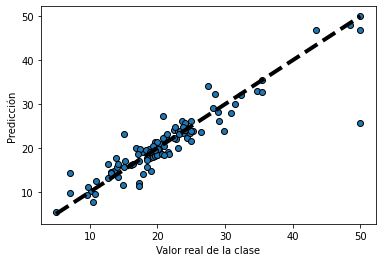

In [ ]:
grafica_real_vs_pred(y_test, y_pred, metricas, model)

In [21]:
# Get regression graphics
def report_regression_graphics(y_true, y_pred):
    fig, ax = plt.subplots(2,1)

    # Plot linear fit
    ax[0].scatter(y_true, y_pred)
    ax[0].set_ylabel('y_pred')
    ax[0].set_title('Regression line')
    ax[0].grid()
    # overlay the regression line
    z = np.polyfit(np.float64(y_true), y_pred, 1)
    p = np.poly1d(z)
    ax[0].plot(y_true, p(y_true), color='magenta')

    # Plot bisectriz
    ax[1].scatter(y_true, y_pred, edgecolors=(0, 0, 0))
    ax[1].set_xlabel('y_true')
    ax[1].set_ylabel('y_pred')
    ax[1].set_title('Bisector')
    ax[1].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=4)
    ax[1].grid()

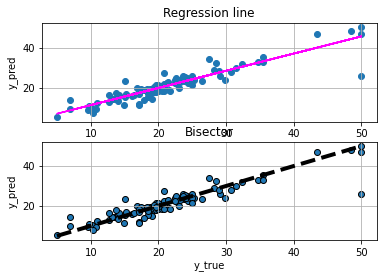

In [22]:
report_regression_graphics(y_test, y_pred)